## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\Deepak\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Deepak\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Deepak\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Data collection and processing

In [2]:
df=pd.read_csv('gld_price_data.csv')

In [3]:
df.head() #print first five rows of the dataframe  

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail() #print last five rows of the dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# we are going to predict the gold price using machine learning
# we will train our machine learning model with these stocks prices
# i.e. EUR/USD, SLV, USD, SPX
# by analysing these values we will try to predict the gold value
# We won't do forecasting here

In [7]:
df.isnull().sum() # Checking missing values
                  # no missing values here

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df.shape #number of rows and columns

(2290, 6)

In [13]:
df.info()    #information about the data
             #since all the datatypes are of requisite type
              #we do  not need to do much processing there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
df.describe().T  #statistical measure of the data frame

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882499,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303296,1.369971,1.598798


In [29]:
correlation=df.corr().T  #find correlation between the points
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


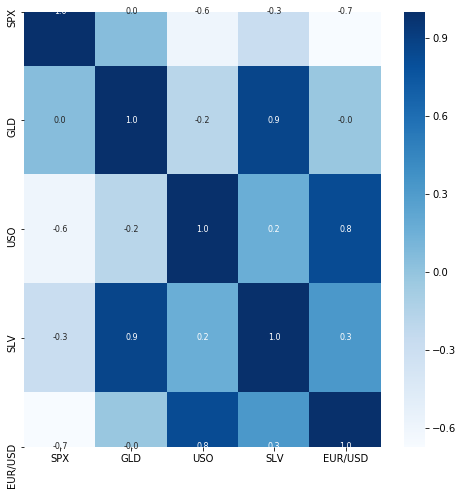

In [24]:
# constructing heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot= True, annot_kws={'size':8},cmap='Blues')

In [30]:
# Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


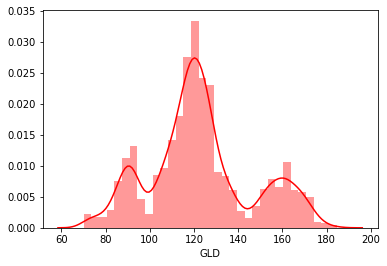

In [33]:
# Checking the distribution of the GLD Price

sns.distplot(df['GLD'],color='red')

#most of the price of gold lies in 120 range

## Splitting features and Target

In [36]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

Model training : Random Forest regressor

In [40]:
regressor=RandomForestRegressor(n_estimators=100)

Training the model

In [41]:
regressor.fit(X_train, Y_train)   #this will train the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Now since we have trained the model we can use it to make some predictions

Model Evaluation

#prediction on Test Data

In [44]:
test_data_prediction=regressor.predict(X_test)

In [45]:
print(test_data_prediction)

[168.62139928  82.11270001 115.90119996 127.63840081 120.61810131
 154.90259732 150.28839871 126.15970028 117.43169876 126.15830048
 117.03210094 172.08880099 141.37849871 167.6136994  115.17959994
 117.43990066 139.57500244 170.04700094 159.29080288 159.84619951
 155.22620031 125.08500045 175.68609962 156.6547028  125.09800078
  93.84989996  77.1458002  120.39489983 119.12569918 167.4177003
  88.31750046 124.87580004  91.10460057 117.70020049 121.1617992
 136.73840063 115.45330148 115.5017008  147.68060004 106.95880092
 104.14770228  87.19559778 126.40210082 117.89860027 150.60379881
 119.69270001 108.40170017 108.13689847  93.19240052 127.20159759
  74.7397005  113.74799944 121.35740028 111.09299905 118.83459884
 120.72029957 159.02269998 168.51920091 146.95659649  85.3172982
  94.27390036  86.85519836  90.62510022 118.93450092 126.41660078
 127.51519982 170.81860068 122.24139913 117.48659903  98.57360048
 168.48500156 142.97559821 131.99080253 121.05390216 121.65559905
 119.66300084

In [46]:
# Comparing predicted values with the actual values

In [47]:
# R squared error will be used for that

In [50]:
error_score=metrics.r2_score(Y_test, test_data_prediction)
print('R_squared error:', error_score)

R_squared error: 0.9892910882882715


## Comparing actual values and predicted values in A pLOT


In [51]:
Y_test=list(Y_test)

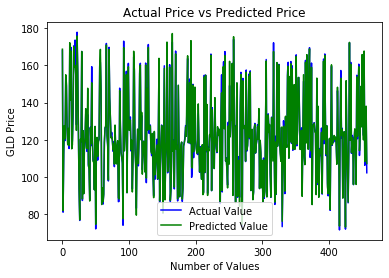

In [59]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()